In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Auction_master_train.csv – 서울/부산 지역의 낙찰가를 포함하여 경매 물건 아파트의 위치, 감정가, 경매 개시/종결일 등의 기본 정보(*최근2년)
df = pd.read_csv('./Auction_master_train.csv')

# 1. 전처리

## 1-1. 데이터 탐색

In [6]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [7]:
#데이터 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [8]:
# 데이터의 요약 통계 확인
df.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


## 1-2. 데이터 전처리
   - 결측값 열 제거

In [9]:
#결측값 열 확인
#결측값 존재 열 6개 -> ['addr_li', 'addr_bunji1', 'addr_bunji2', 'Specific', 'road_bunji1','road_bunji2']
df.isnull().sum(axis=0)

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [10]:
#결측값 열 제거
#6개 열 제거, 열 개수 41 -> 35
print(len(df.columns))
df = df.dropna(axis=1)
print(len(df.columns))


41
35


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 35 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

# 2. EDA

## 2-1. 연속형 변수 간 상관관계 Heatmap

In [12]:
#변수 데이터 타입 확인 후
#object가 아닌 칼럼만 추출
num_cols = []
for column in df.columns:
    column_type = df[column].dtype
    if column_type != object:
        num_cols.append(column)


In [13]:
#빈 데이터프레임 생성
#추출된 칼럼 데이터프레임 생성
df_num = pd.DataFrame()

for column in num_cols:
    df_num = pd.concat([df_num, df[[column]]], axis = 1)

In [14]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 16 columns):
Auction_key                    1933 non-null int64
Claim_price                    1933 non-null int64
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
Total_floor                    1933 non-null int64
Current_floor                  1933 non-null int64
point.y                        1933 non-null float64
point.x                        1933 non-null float64
Hammer_price                   1933 non-null int64
dtypes: float64(7), int64(9)
memory usage: 241.8 KB


In [15]:
#한번에 하는 방법 찾음 ._.
num_cols = df._get_numeric_data().columns
df_num = df[num_cols]

In [16]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 16 columns):
Auction_key                    1933 non-null int64
Claim_price                    1933 non-null int64
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
Total_floor                    1933 non-null int64
Current_floor                  1933 non-null int64
point.y                        1933 non-null float64
point.x                        1933 non-null float64
Hammer_price                   1933 non-null int64
dtypes: float64(7), int64(9)
memory usage: 241.8 KB


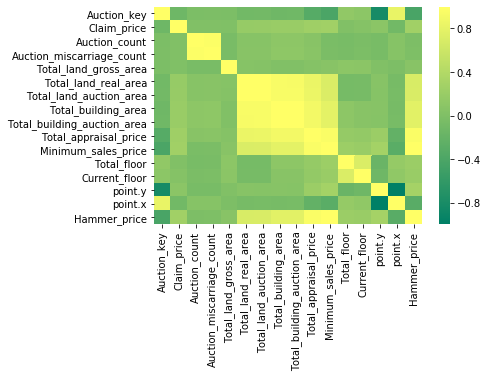

In [17]:
#Heatmap 그리기
sns.heatmap(df_num.corr(),cmap='summer')

## 2-2 연속형 변수 간 Histogram   

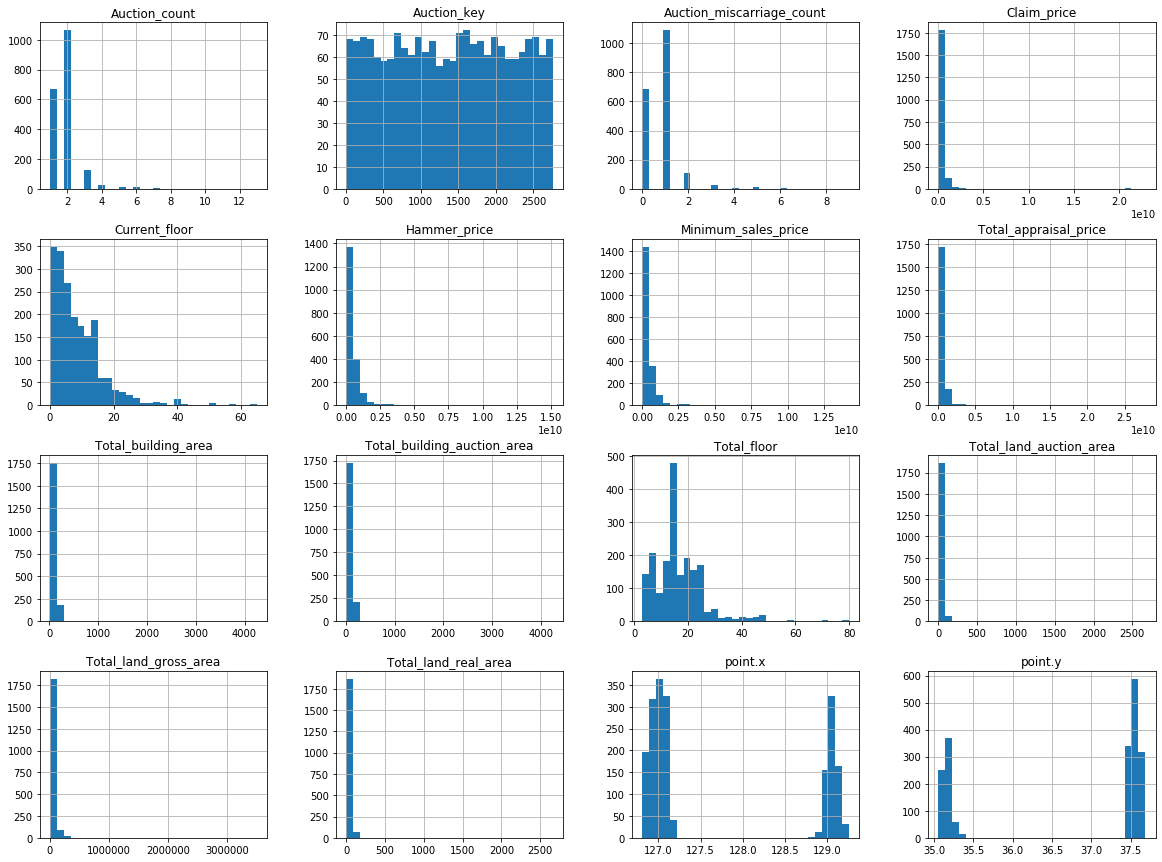

In [18]:
# 모든 연속형 변수에 대한 히스토그램
df_num.hist(bins=30,figsize=(20,15))
plt.show()

## 2-3 시각화

   - 아파트층수 와 낙찰가
   - 낙찰된 월 과 낙찰가
   - 낙찰된 계절 과 낙찰가
   - 대표용도 와 낙찰가
   - 입찰구분 과 낙찰가

In [19]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
# 맥북이기에 애플고딕을 사용
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [105]:
# 변수 설명

In [20]:
import requests
import selenium
import json
from selenium import webdriver
from bs4 import BeautifulSoup

In [21]:
url = 'https://newapi.dacon.io:3000/competition/data?cpt_id=17801'

In [22]:
response = requests.get(url)
raw_data = response.text
data = json.loads(raw_data)

In [23]:
data

{'message': 'data',
 'data': [{'data_id': 3644,
   'cpt_id': 17801,
   'data_name': 'Auction_master_train.csv',
   'column_explain': '{"Auction_key":"경매 아파트 고유 키값","Auction_class":"경매구분  강제경매 : 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매를 진행 임의경매 : 등기부등본 담보권(저당권, 가압류등)으로 경매를 진행","Bid_class":"입찰구분(일반/개별/일괄)","Claim_price":"경매 신청인의 청구 금액","Appraisal_company":"감정사","Appraisal_date":"감정일자","Auction_count":"총경매횟수","Auction_miscarriage_count":"총유찰횟수","Total_land_gross_area":"총토지전체면적(㎡)","Total_land_real_area":"총토지실면적(㎡)","Total_land_auction_area":"총토지경매면적(㎡)","Total_building_area":"총건물면적(㎡)","Total_building_auction_area":"총건물경매면적(㎡)","Total_appraisal_price":"총감정가","Minimum_sales_price":"최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액","First_auction_date":"최초경매일","Final_auction_date":"최종경매일","Final_result":"최종결과","Creditor":"채권자, 경매 신청인","addr_do":"주소_시도","addr_si":"주소_시군구","addr_dong":"주소_읍면동","addr_li":"주소_리","addr_san":"주소_산번지 여부(Y/N)","addr_bunji1":"주소_번지1","addr_bunji2":"주소_번지2","addr_etc":"주소_기타주소","Apartment

In [24]:
data['data'][0]['column_explain']

'{"Auction_key":"경매 아파트 고유 키값","Auction_class":"경매구분  강제경매 : 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매를 진행 임의경매 : 등기부등본 담보권(저당권, 가압류등)으로 경매를 진행","Bid_class":"입찰구분(일반/개별/일괄)","Claim_price":"경매 신청인의 청구 금액","Appraisal_company":"감정사","Appraisal_date":"감정일자","Auction_count":"총경매횟수","Auction_miscarriage_count":"총유찰횟수","Total_land_gross_area":"총토지전체면적(㎡)","Total_land_real_area":"총토지실면적(㎡)","Total_land_auction_area":"총토지경매면적(㎡)","Total_building_area":"총건물면적(㎡)","Total_building_auction_area":"총건물경매면적(㎡)","Total_appraisal_price":"총감정가","Minimum_sales_price":"최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액","First_auction_date":"최초경매일","Final_auction_date":"최종경매일","Final_result":"최종결과","Creditor":"채권자, 경매 신청인","addr_do":"주소_시도","addr_si":"주소_시군구","addr_dong":"주소_읍면동","addr_li":"주소_리","addr_san":"주소_산번지 여부(Y/N)","addr_bunji1":"주소_번지1","addr_bunji2":"주소_번지2","addr_etc":"주소_기타주소","Apartment_usage":"건물(토지)의 대표 용도","Completion_date":"준공일","Preserve_regist_date":"보존등기일, 건물을 신축하고 처음으로 등기","Total_floor":"총층수","Current_floor":

In [25]:
column_list = json.loads(data['data'][0]['column_explain'])

In [26]:
column_list

{'Auction_key': '경매 아파트 고유 키값',
 'Auction_class': '경매구분  강제경매 : 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매를 진행 임의경매 : 등기부등본 담보권(저당권, 가압류등)으로 경매를 진행',
 'Bid_class': '입찰구분(일반/개별/일괄)',
 'Claim_price': '경매 신청인의 청구 금액',
 'Appraisal_company': '감정사',
 'Appraisal_date': '감정일자',
 'Auction_count': '총경매횟수',
 'Auction_miscarriage_count': '총유찰횟수',
 'Total_land_gross_area': '총토지전체면적(㎡)',
 'Total_land_real_area': '총토지실면적(㎡)',
 'Total_land_auction_area': '총토지경매면적(㎡)',
 'Total_building_area': '총건물면적(㎡)',
 'Total_building_auction_area': '총건물경매면적(㎡)',
 'Total_appraisal_price': '총감정가',
 'Minimum_sales_price': '최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액',
 'First_auction_date': '최초경매일',
 'Final_auction_date': '최종경매일',
 'Final_result': '최종결과',
 'Creditor': '채권자, 경매 신청인',
 'addr_do': '주소_시도',
 'addr_si': '주소_시군구',
 'addr_dong': '주소_읍면동',
 'addr_li': '주소_리',
 'addr_san': '주소_산번지 여부(Y/N)',
 'addr_bunji1': '주소_번지1',
 'addr_bunji2': '주소_번지2',
 'addr_etc': '주소_기타주소',
 'Apartment_usage': '건물(토지)의 대표 용도',
 'Completion_date': '준공일',


In [27]:
# 칼럼 설명이 긴 경우 칼럼명 변경
# 'Completion_date'(준공일) 칼럼은 실제 데이터에는 미존재 -> 제거
column_list['Auction_class'] = '경매구분 강제경매'
column_list['Share_auction_YorN'] = '지분경매 여부(Y/N)'
column_list['Close_result'] = '종국결과'
column_list.pop('Completion_date')

'준공일'

In [28]:
column_list

{'Auction_key': '경매 아파트 고유 키값',
 'Auction_class': '경매구분 강제경매',
 'Bid_class': '입찰구분(일반/개별/일괄)',
 'Claim_price': '경매 신청인의 청구 금액',
 'Appraisal_company': '감정사',
 'Appraisal_date': '감정일자',
 'Auction_count': '총경매횟수',
 'Auction_miscarriage_count': '총유찰횟수',
 'Total_land_gross_area': '총토지전체면적(㎡)',
 'Total_land_real_area': '총토지실면적(㎡)',
 'Total_land_auction_area': '총토지경매면적(㎡)',
 'Total_building_area': '총건물면적(㎡)',
 'Total_building_auction_area': '총건물경매면적(㎡)',
 'Total_appraisal_price': '총감정가',
 'Minimum_sales_price': '최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액',
 'First_auction_date': '최초경매일',
 'Final_auction_date': '최종경매일',
 'Final_result': '최종결과',
 'Creditor': '채권자, 경매 신청인',
 'addr_do': '주소_시도',
 'addr_si': '주소_시군구',
 'addr_dong': '주소_읍면동',
 'addr_li': '주소_리',
 'addr_san': '주소_산번지 여부(Y/N)',
 'addr_bunji1': '주소_번지1',
 'addr_bunji2': '주소_번지2',
 'addr_etc': '주소_기타주소',
 'Apartment_usage': '건물(토지)의 대표 용도',
 'Preserve_regist_date': '보존등기일, 건물을 신축하고 처음으로 등기',
 'Total_floor': '총층수',
 'Current_floor': '현재층수',
 'Sp

   - 아파트층수 와 낙찰가

In [29]:
# 낙찰가 범위는 약630만원 ~ 약150억
# 150억 다음으로 높은 낙찰가는 약 50억
df['Hammer_price'].sort_values()

611         6303000
1112        8008000
1392       11001123
442        12760000
142        13010000
           ...     
1153     3663000000
1212     3721000000
1602     3729990000
1515     4863000000
1521    15151000000
Name: Hammer_price, Length: 1933, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

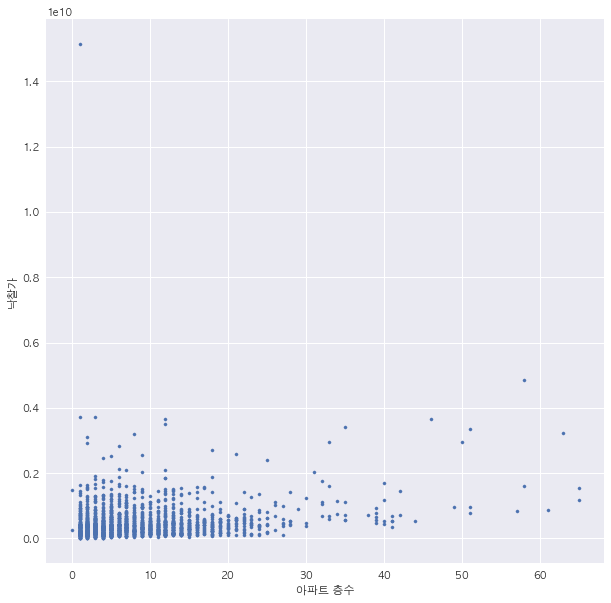

In [12]:
# 약150억 낙찰가 값만 멀리 떨어져있는 것 확인 가능
plt.figure(figsize = (10,10))
plt.scatter(x=df['Current_floor'],y=df['Hammer_price'], s = 10)
plt.xlabel("아파트 층수")
plt.ylabel("낙찰가")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

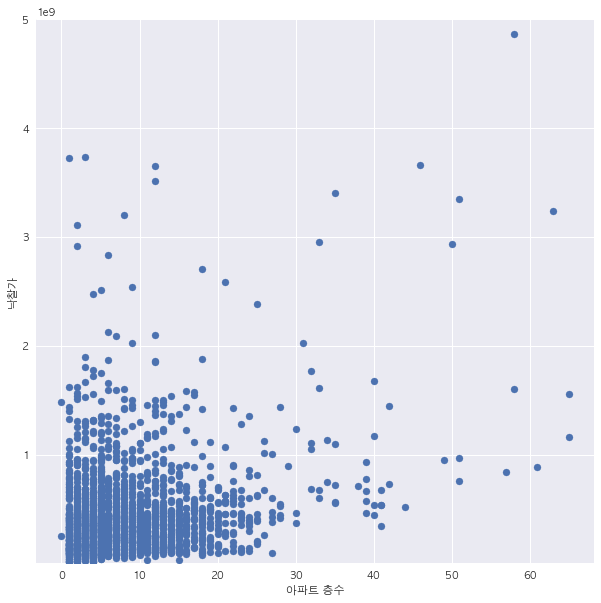

In [13]:
# 150억의 낙찰가를 제외하고 500만원 ~ 50억 낙찰가 범위 설정
plt.figure(figsize = (10,10))
plt.scatter(x=df['Current_floor'],y=df['Hammer_price'])
plt.xlabel("아파트 층수")
plt.ylabel("낙찰가")
plt.ylim([5.000000e+06, 5.000000e+9])
plt.show

In [14]:
# Hammer_price의 데이터 분포 확인
df['Hammer_price'].describe()

count    1.933000e+03
mean     4.726901e+08
std      5.574493e+08
min      6.303000e+06
25%      1.975550e+08
50%      3.544500e+08
75%      5.599000e+08
max      1.515100e+10
Name: Hammer_price, dtype: float64

In [15]:
#Hammer_price < 5억5천9백9십만원 인 데이터가 약 75%인 1449행
len(df.query('Hammer_price < 5.599000e+08'))

1449

<function matplotlib.pyplot.show(*args, **kw)>

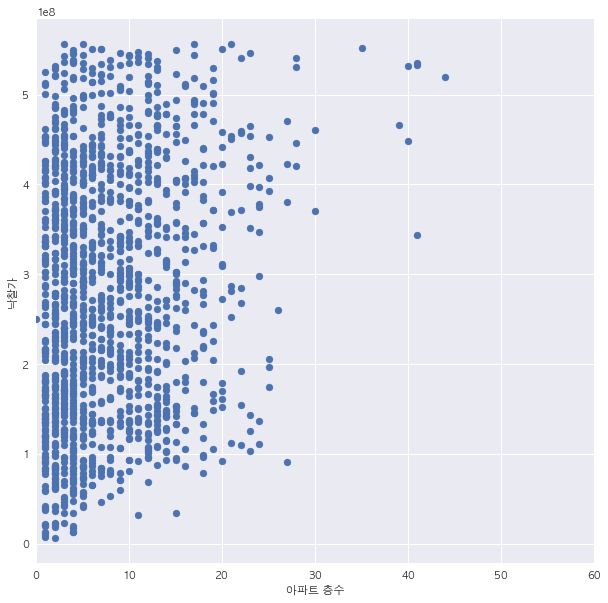

In [16]:
# 150억의 낙찰가를 제외하고 500만원 ~ 50억 낙찰가 범위 설정
# 같은 층임에도 낙찰가의 범위가 매우 넓은 분포를 보이지만 아파트 층수가 높아질수록 보다 낮은 낙찰가가 없는 것을 어느정도 확인할 수 있음
# df2 는 Hammer_price 75%를 포함하는 범위의 데이터프레임
plt.figure(figsize = (10,10))
df2 = df[df['Hammer_price'] < 5.599000e+08]
plt.scatter(x=df2['Current_floor'],y=df2['Hammer_price'])
plt.xlabel("아파트 층수")
plt.ylabel("낙찰가")
plt.xlim([0, 60])
plt.show

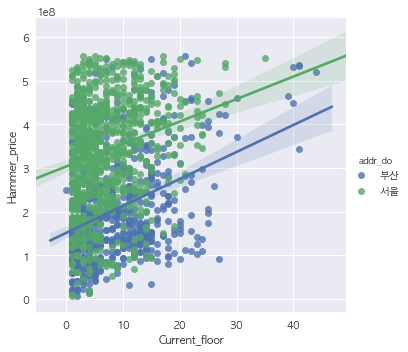

In [17]:
# 산포도에 대한 추세선을 확인해보면, 낙찰가 와 아파트층수 간에는 양의 관계를 나타냄을 볼 수 있음
# 'addr_do'의 서울/부산 으로 데이터를 구분한 결과,
# 서울 아파트의 경우 좀 더 높은 낙찰가를 보였으며, 낙찰가와 아파트층수의 관계는 부산 아파트의 경우가 더 가파른 기울기를 보임
sns.lmplot(x='Current_floor',y='Hammer_price',data=df2, hue='addr_do')

   - 낙찰된 계절 과 낙찰가

In [18]:
# 'Final_auction_date', 최종경매일 과 Hammer_price 를 추출
# 'Final_auction_date'은 년,월,일로 구분되어 있음
df_final = df[['Final_auction_date', 'Hammer_price']]
df_final.head()

,Final_auction_date,Hammer_price
0,2018-03-20 00:00:00,760000000
1,2017-02-02 00:00:00,971889999
2,2017-10-13 00:00:00,93399999
3,2017-11-02 00:00:00,256899000
4,2016-08-03 00:00:00,158660000


In [19]:
# 년,월,일에서 계절을 구분할 수 있는 '월'을 추출
df_final['Final_auction_date'] = df['Final_auction_date'].apply(lambda x: x.split('-')[1])
df_final.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Final_auction_date,Hammer_price
0,03,760000000
1,02,971889999
2,10,93399999
3,11,256899000
4,08,158660000


In [20]:
#칼럼의 dtype을 str -> int 로 변환
df_final['Final_auction_date'].astype('int')

0        3
1        2
2       10
3       11
4        8
        ..
1928     6
1929     3
1930     1
1931    11
1932     5
Name: Final_auction_date, Length: 1933, dtype: int64

In [21]:
month = df_final['Final_auction_date'].value_counts()

In [22]:
from itertools import chain, repeat

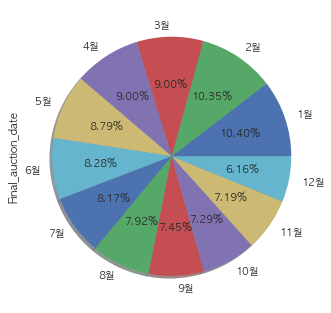

In [23]:
# pie 차트
# 1월의 경우 10.4%로 경매종료일이 가장 많은 달, 12월이 6.16%로 경매종료일이 가장 적은 달
# 겨우 한달 사이에 약 4%가 넘는 경매 수의 차이를 보임
labels = []
for i in range(12):
    i += 1
    value = f'{i}월'
    labels.append(value)
    
explode = list(repeat(0,12)) #그래프간의 padding 개념으로 이해했음
month.plot.pie(explode=explode,autopct='%1.2f%%',shadow=True, labels = labels) 
plt.show()

In [24]:
#새로운 칼럼인 'season' 생성
df_final['season'] = ''

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
# 월을 계절별로 분류(임의로 분류)
# 11,12,1,2 -> 겨울
# 3,4 -> 봄
# 5,6,7,8, -> 여름
# 9,10 -> 가을
df_final.loc[df_final['Final_auction_date'].str.contains('11|12|01|02'), 'season'] = '겨울'
df_final.loc[df_final['Final_auction_date'].str.contains('03|04'), 'season'] = '봄'
df_final.loc[df_final['Final_auction_date'].str.contains('05|06|07|08'), 'season'] = '여름'
df_final.loc[df_final['Final_auction_date'].str.contains('09|10'), 'season'] = '가을'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [115]:
df_final

,Final_auction_date,Hammer_price,season
0,03,760000000,봄
1,02,971889999,겨울
2,10,93399999,가을
3,11,256899000,겨울
4,08,158660000,여름
...,...,...,...
1928,06,402500000,여름
1929,03,430234600,봄
1930,01,1118999990,겨울
1931,11,403000000,겨울


<function matplotlib.pyplot.show(*args, **kw)>

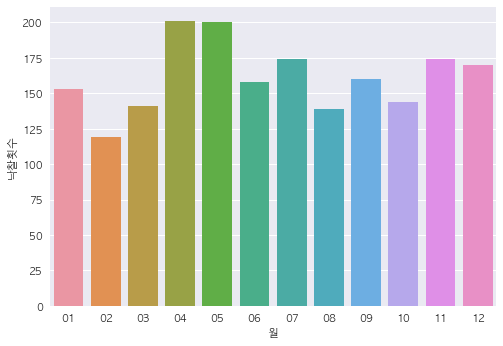

In [119]:
# 월별 최종경매일(낙찰일) 횟수 비교
# 4월, 5월이 높은 수를 보여줌
mon = sns.countplot("Final_auction_date" , data=df_final)
mon.set_xlabel('월')
mon.set_ylabel('낙찰횟수')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

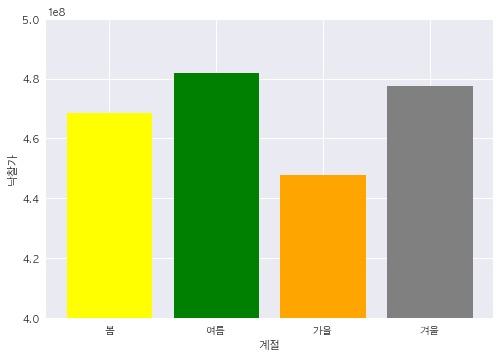

In [86]:
# 계절별 'Hammer_price'의 평균값
# 낙찰가(y축) 범위는 4억 ~ 5억
# 여름의 낙찰가 평균 값이 가장 높으며, 가을의 경우가 가장 낮음 (값 표시 실패 ㅠ)
season_mean = df_final.groupby('season').Hammer_price.mean().sort_values()
season_mean = season_mean[['봄', '여름', '가을', '겨울']]
plt.bar(season_mean.index ,season_mean, color=['yellow', 'green', 'orange', 'gray'])
plt.xlabel("계절")
plt.ylabel("낙찰가")
plt.ylim([4e+08,5e+08])
plt.show

   - 대표용도 / 입찰구분 과 낙찰가

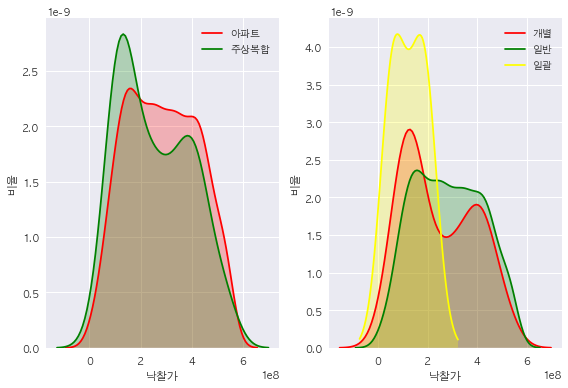

In [111]:
# 'Apartment_usage', 대표용도 별 그래프
# 'Bid class', 입찰구분 별 그래프

use = plt.subplot(1,2,1)
use = sns.kdeplot(df2.query('Apartment_usage == "아파트"')['Hammer_price'], color = "red",shade= True)
use = sns.kdeplot(df2.query('Apartment_usage == "주상복합"')['Hammer_price'], color = 'green', shade = True)
use.set_xlabel('낙찰가')
use.set_ylabel('비율')
use = use.legend(['아파트','주상복합'])

bid = plt.subplot(1,2,2)
bid = sns.kdeplot(df2.query('Bid_class == "개별"')['Hammer_price'], color = "red",shade= True)
bid = sns.kdeplot(df2.query('Bid_class == "일반"')['Hammer_price'], color = 'green', shade = True)
bid = sns.kdeplot(df2.query('Bid_class == "일괄"')['Hammer_price'], color = 'yellow', shade = True)
bid.set_xlabel('낙찰가')
bid.set_ylabel('비율')
bid = bid.legend(['개별','일반','일괄'])

plt.tight_layout()
plt.show()

# 3. Feature 생성

   - 'season' 최종경매계절 생성
   - 'period' 최초경매일과 최종경매일 기간 생성
   - 'floor_loc' 아파트 현재 층 위치
   - 'age' 건물의 나이 (보존등기일부터 현재까지의 기간)
   - 'pprice' 평당 경매 낙찰 가격
   - 'range' 감정가 와 낙찰가의 차이
   - 'aprice' 평당 경매 감정 가격
   - 'term' 감정일자와 최초경매일 차이

In [30]:
# 새로운 feature을 저장할 새로운 데이터프레임 생성
df_new = pd.DataFrame()
df_new.head()

""


   - 'season' 최종경매계절 생성

In [31]:
df_new['season'] = ''

In [32]:
# 년,월,일에서 계절을 구분할 수 있는 '월'을 추출
df_new['season'] = df['Final_auction_date'].apply(lambda x: x.split('-')[1])

In [33]:
# 월을 계절별로 분류(임의로 분류)
# 11,12,1,2 -> 겨울
# 3,4 -> 봄
# 5,6,7,8, -> 여름
# 9,10 -> 가을
df_new.loc[df_new['season'].str.contains('11|12|01|02'), 'season'] = '겨울'
df_new.loc[df_new['season'].str.contains('03|04'), 'season'] = '봄'
df_new.loc[df_new['season'].str.contains('05|06|07|08'), 'season'] = '여름'
df_new.loc[df_new['season'].str.contains('09|10'), 'season'] = '가을'

In [34]:
# 최종경매가 이뤄진 계절 feature 생성
df_new['season'].value_counts()

여름    671
겨울    616
봄     342
가을    304
Name: season, dtype: int64

   - 'period' 최초경매일과 최종경매일 기간 생성

In [35]:
df_new['period'] = ''

In [36]:
df_days = df[['First_auction_date', 'Final_auction_date']]

In [37]:
import datetime

In [38]:
# 문자열로 된 날짜 -> datetime 객체로 변환 함수
def convertdate(dstring):
    return datetime.datetime.strptime(dstring, '%Y-%m-%d  %H:%M:%S')

In [39]:
# 문자열로 된 날짜 -> datetime 객체로 변환 
# 최종경매일 - 최초경매일
# days 값 split
df_days['First_auction_date'] = df['First_auction_date'].apply(convertdate)
df_days['Final_auction_date'] = df['Final_auction_date'].apply(convertdate)

df_new['period'] = df_days['Final_auction_date'] - df_days['First_auction_date']
df_new['period'] = df_new['period'].astype('str')
df_new['period'] = df_new['period'].apply(lambda x: x.split(' ')[0])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


   - 'floor_loc' 아파트 현재 층 위치

In [40]:
df_new['floor_loc'] = ''

In [41]:
# 현재층  / 전체층 -> 전체층 에 대한 현재층의 위치를 알 수 있음
# 층 높이에 대한 절대적인 위치를 알 수는 없지만 전체층에 대한 상대적인 위치를 알 수 있음
# 즉, 1의 값은 아파트의 꼭대기, 0.5는 아파트의 중간을 의미함
df_new['floor_loc'] = df['Current_floor'] / df['Total_floor']

In [42]:
df_new['floor_loc'] = df_new['floor_loc'].apply(lambda x : round(x,3))

In [43]:
df_new['floor_loc'].value_counts()

1.000    135
0.200     81
0.333     75
0.400     73
0.600     71
        ... 
0.433      1
0.452      1
0.054      1
0.767      1
0.893      1
Name: floor_loc, Length: 290, dtype: int64

   - 'age' 건물의 나이 (보존등기일부터 현재까지의 기간)

In [44]:
# 보존등기일 : 건물 소유권 보존등기란 소유자의 신청에 의해 미등기의 건물에 처음으로 행해지는 소유권 등기를 말합니다 (출처 : 법제처)
# 보존등기일이 실제 건물이 완공된 시점이라고 볼 수는 없지만, 어느정도 예측 가능함
df_new['age'] = ''

In [45]:
df_age = df[['Preserve_regist_date']]

In [46]:
df_age['Preserve_regist_date'] = df['Preserve_regist_date'].apply(convertdate)
current = datetime.datetime.now()
df_new['age'] = df_age['Preserve_regist_date'].apply(lambda x: current - x)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_new['age'] = df_new['age'].astype('str')
df_new['age'] = df_new['age'].apply(lambda x: x.split(' ')[0])

In [48]:
df_new['age'].value_counts()

331716    43
17832     27
2906      12
3095       9
1683       7
          ..
13437      1
5422       1
7690       1
8723       1
8846       1
Name: age, Length: 1256, dtype: int64

   - 'pprice' 평당 경매 낙찰 가격

In [49]:
df_new['pprice'] = ''

In [50]:
df_per = df[['Total_land_auction_area']]

In [51]:
# 낙찰가 를 총토지경매면적 로 나누어 1㎡ 당 가격을 구함
# 총토지경매면적 인 'Total_land_auction_area'는 단위가 ㎡으로 되어있음
# 1평  = 약 3.3㎡
df_per['Total_land_auction_area'] = round((df['Total_land_auction_area'] / 3.3),3)
df_new['pprice'] = df['Hammer_price'] / df_per['Total_land_auction_area']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [52]:
df_new['pprice'] = df_new['pprice'].apply(lambda x : round(x,3))

In [53]:
df_new['pprice']

0       6.714967e+07
1       1.709569e+08
2       4.341157e+06
3       2.570532e+07
4       1.158863e+07
            ...     
1928    3.275553e+07
1929    3.585288e+07
1930    1.940350e+08
1931    3.151392e+07
1932    4.956003e+07
Name: pprice, Length: 1933, dtype: float64

   - 'range' 감정가 와 낙찰가의 차이

In [54]:
df_new['range'] = ''

In [55]:
df_new['range'] = df['Total_appraisal_price'] - df['Hammer_price']

In [56]:
df_new['range']

0        76000000
1       101110001
2        25600001
3        31501000
4        11340000
          ...    
1928     -1500000
1929     23765400
1930    166000010
1931      4000000
1932     63990000
Name: range, Length: 1933, dtype: int64

   - 'aprice' 평당 경매 감정 가격

In [67]:
df_new['aprice'] = ''

In [68]:
df_per = df[['Total_land_auction_area']]

In [69]:
# 총감정가 를 총토지경매면적 로 나누어 1㎡ 당 가격을 구함
# 총토지경매면적 인 'Total_land_auction_area'는 단위가 ㎡으로 되어있음
# 1평  = 약 3.3㎡
df_per['Total_land_auction_area'] = round((df['Total_land_auction_area'] / 3.3),3)
df_new['aprice'] = df['Total_appraisal_price'] / df_per['Total_land_auction_area']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:
df_new['aprice']

0       7.386464e+07
1       1.887423e+08
2       5.531025e+06
3       2.885731e+07
4       1.241692e+07
            ...     
1928    3.263346e+07
1929    3.783333e+07
1930    2.228195e+08
1931    3.182671e+07
1932    5.418292e+07
Name: aprice, Length: 1933, dtype: float64

   - 'term' 감정일자와 최초경매일 차이

In [61]:
df_new['term'] = ''

In [62]:
df_days = df[['Appraisal_date', 'First_auction_date']]

In [63]:
# 문자열로 된 날짜 -> datetime 객체로 변환 
# 최초경매일 - 감정일자
# days 값 split
df_days['Appraisal_date'] = df['Appraisal_date'].apply(convertdate)
df_days['First_auction_date'] = df['First_auction_date'].apply(convertdate)

df_new['term'] = df_days['First_auction_date'] - df_days['Appraisal_date']
df_new['term'] = df_new['term'].astype('str')
df_new['term'] = df_new['term'].apply(lambda x: x.split(' ')[0])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [64]:
df_new['term']

0       202
1       108
2       248
3       219
4       121
       ... 
1928    123
1929    723
1930    426
1931    115
1932    369
Name: term, Length: 1933, dtype: object

In [71]:
df_new.head()

,season,period,floor_loc,age,pprice,range,aprice,term
0,봄,35,0.111,3847,6.714967e+07,76000000,7.386464e+07,202
1,겨울,35,0.729,2962,1.709569e+08,101110001,1.887423e+08,108
2,가을,77,0.933,10039,4.341157e+06,25600001,5.531025e+06,248
3,겨울,105,0.550,6770,2.570532e+07,31501000,2.885731e+07,219
4,여름,28,1.000,6633,1.158863e+07,11340000,1.241692e+07,121


In [73]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,2009-07-14 00:00:00,45,5,N,해운대해변로,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,2011-12-16 00:00:00,70,51,N,마린시티2로,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,1992-07-31 00:00:00,15,14,N,모라로110번길,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,2001-07-13 00:00:00,20,11,N,황령대로319번가길,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,2001-11-27 00:00:00,7,7,N,오작로,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [74]:
new_df = pd.concat([df, df_new], axis = 1 )

In [77]:
new_df.to_excel('dataset.xlsx')